<a href="https://colab.research.google.com/github/mmc7676/House_2018results/blob/master/house18precinct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This tested Samsung Dex's compatibiity with Colab completely in the cloud-used Galaxy S10+.

Pull Directly in to Colab

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/MEDSL/2018-elections-official/master/district_overall_2018.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 18 columns):
year              1411 non-null int64
state             1411 non-null object
state_po          1411 non-null object
state_fips        1411 non-null int64
state_cen         1411 non-null int64
state_ic          1411 non-null int64
office            1411 non-null object
district          1411 non-null object
stage             1411 non-null object
special           1411 non-null bool
candidate         1256 non-null object
party             1250 non-null object
writein           1411 non-null bool
mode              1411 non-null object
candidatevotes    1411 non-null int64
totalvotes        1411 non-null int64
unofficial        1411 non-null bool
version           1411 non-null int64
dtypes: bool(3), int64(7), object(8)
memory usage: 169.6+ KB


In [2]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,2018,California,CA,6,93,71,U.S. Representative,District 1,gen,False,Audrey Denney,democrat,False,total,263096,583188,False,20190131
1,2018,California,CA,6,93,71,U.S. Representative,District 1,gen,False,Doug La Malfa,republican,False,total,320092,583188,False,20190131
2,2018,California,CA,6,93,71,U.S. Representative,District 10,gen,False,Jeff Denham,republican,False,total,211910,443800,False,20190131
3,2018,California,CA,6,93,71,U.S. Representative,District 10,gen,False,Josh Harder,democrat,False,total,231890,443800,False,20190131
4,2018,California,CA,6,93,71,U.S. Representative,District 11,gen,False,John Fitzgerald,republican,False,total,142624,551362,False,20190131


In [0]:
df['pct_vote'] = df.apply(lambda row: row.candidatevotes/row.totalvotes, axis=1)
df['race'] = df.state_po.map(str) + "_" + df.district.map(str)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1411.0,2.018000e+03,0.000000,2018.0,2.018000e+03,2.018000e+03,2.018000e+03,2018.0
state_fips,1411.0,2.874203e+01,15.187623,1.0,1.300000e+01,3.100000e+01,4.000000e+01,56.0
state_cen,1411.0,5.243940e+01,25.191741,11.0,3.100000e+01,5.600000e+01,7.400000e+01,95.0
state_ic,1411.0,3.826364e+01,20.688571,1.0,2.100000e+01,4.300000e+01,5.150000e+01,82.0
candidatevotes,1411.0,9.361106e+04,87423.266141,0.0,4.616500e+03,9.548600e+04,1.538325e+05,550584.0
totalvotes,1411.0,3.064989e+05,124064.761256,117494.0,2.380075e+05,2.754060e+05,3.239280e+05,762498.0
version,1411.0,2.019013e+07,0.000000,20190131.0,2.019013e+07,2.019013e+07,2.019013e+07,20190131.0
pct_vote,1411.0,3.054571e-01,0.269393,0.0,1.741808e-02,3.050914e-01,5.191042e-01,1.0


In [0]:
final_df =df.copy()

In [0]:
final_df = final_df.drop(['year','state_cen','stage','special', 'state','unofficial','version','state_ic','state_fips','mode','office'], axis = 1)


In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 9 columns):
state_po          1411 non-null object
district          1411 non-null object
candidate         1256 non-null object
party             1250 non-null object
writein           1411 non-null bool
candidatevotes    1411 non-null int64
totalvotes        1411 non-null int64
pct_vote          1411 non-null float64
race              1411 non-null object
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 89.7+ KB


In [8]:
final_df.groupby('writein').count()



,state_po,district,candidate,party,candidatevotes,totalvotes,pct_vote,race
writein,,,,,,,,
False,1255,1255,1255,1250,1255,1255,1255,1255
True,156,156,1,0,156,156,156,156


In [0]:
df_writein = final_df[final_df['writein']==True]

In [0]:
df_reg = final_df[final_df['writein']==False]

In [11]:
df_writein.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 132 to 1378
Data columns (total 9 columns):
state_po          156 non-null object
district          156 non-null object
candidate         1 non-null object
party             0 non-null object
writein           156 non-null bool
candidatevotes    156 non-null int64
totalvotes        156 non-null int64
pct_vote          156 non-null float64
race              156 non-null object
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 11.1+ KB


In [12]:
write_can = pd.pivot_table(df_writein, values='candidatevotes', index=['race','candidate'], aggfunc = np.count_nonzero)
write_can

,,candidatevotes
race,candidate,
AZ_District 8,Steven Hummel,1


In [13]:
df_writein[df_writein['candidatevotes'] > 1000]

,state_po,district,candidate,party,writein,candidatevotes,totalvotes,pct_vote,race
223,IL,District 3,NaN,NaN,True,2396,223334,0.010728,IL_District 3
423,NY,District 16,NaN,NaN,True,1312,183356,0.007155,NY_District 16
718,VA,District 3,NaN,NaN,True,19107,217722,0.087759,VA_District 3
864,AL,District 7,NaN,NaN,True,4153,189163,0.021955,AL_District 7
867,AK,District 0,NaN,NaN,True,1188,282166,0.004210,AK_District 0
1021,MA,District 1,NaN,NaN,True,5110,216900,0.023559,MA_District 1
1030,MA,District 4,NaN,NaN,True,5727,251016,0.022815,MA_District 4
1039,MA,District 7,NaN,NaN,True,3852,220411,0.017476,MA_District 7
1041,MA,District 8,NaN,NaN,True,4148,263307,0.015753,MA_District 8
1072,MN,District 5,NaN,NaN,True,1215,343358,0.003539,MN_District 5


In [0]:
df_writein = df_writein.drop(['candidate','party', 'writein'], axis = 1)

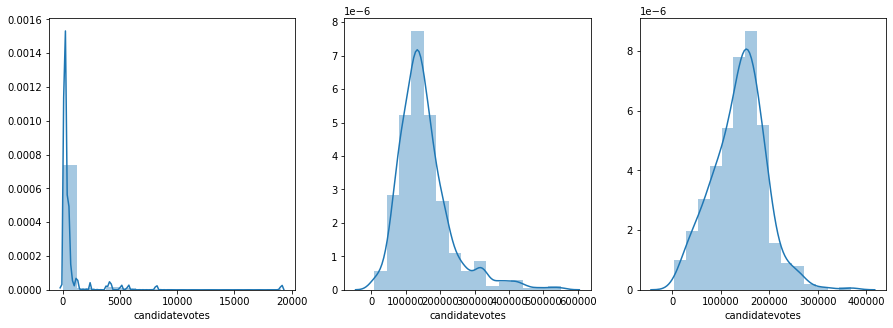

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(15,5))# changes size 5 y axis 15 x axis


plt.subplot(131)

sns.distplot(final_df.loc[final_df['writein'] == True, 'candidatevotes'], bins = 15)


plt.subplot(132)

sns.distplot(df_reg.loc[df_reg['party'] == 'democrat', 'candidatevotes'], bins = 15)


plt.subplot(133)

sns.distplot(df_reg.loc[df_reg['party'] == 'republican', 'candidatevotes'], bins = 15)

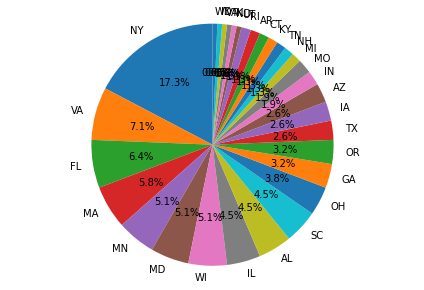

In [16]:
#to show distribution of playoffs versus regular season

fig1, ax1 = plt.subplots()



# gives the categories and the number of instances in each category

x = list(df_writein['state_po'].value_counts().index) 

y = list(df_writein['state_po'].value_counts())

ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)

ax1.axis('equal') 

plt.tight_layout() 


plt.show()



In [17]:
df_writein['state_po'].value_counts()

NY    27
VA    11
FL    10
MA     9
MN     8
MD     8
WI     8
IL     7
AL     7
SC     7
OH     6
GA     5
OR     5
TX     4
IA     4
AZ     4
IN     3
MO     3
MI     2
NH     2
TN     2
KY     2
CT     2
AR     2
RI     2
UT     1
ND     1
AK     1
VT     1
ID     1
WY     1
Name: state_po, dtype: int64

In [18]:
pd.pivot_table(df_writein, values='candidatevotes', index=['state_po'], aggfunc=np.sum)

,candidatevotes
state_po,
AK,1188
AL,5471
AR,356
AZ,448
CT,17
FL,562
GA,683
IA,737
ID,91


In [19]:
race_writeins = pd.pivot_table(df_writein, values='candidatevotes', index=['race'], aggfunc=np.sum)
race_writeins.describe().T

,count,mean,std,min,25%,50%,75%,max
candidatevotes,151.0,560.10596,1851.108944,0.0,63.5,165.0,335.0,19107.0


In [20]:
df_reg.head()

,state_po,district,candidate,party,writein,candidatevotes,totalvotes,pct_vote,race
0,CA,District 1,Audrey Denney,democrat,False,263096,583188,0.451134,CA_District 1
1,CA,District 1,Doug La Malfa,republican,False,320092,583188,0.548866,CA_District 1
2,CA,District 10,Jeff Denham,republican,False,211910,443800,0.477490,CA_District 10
3,CA,District 10,Josh Harder,democrat,False,231890,443800,0.522510,CA_District 10
4,CA,District 11,John Fitzgerald,republican,False,142624,551362,0.258676,CA_District 11


In [0]:
df_reg = df_reg.drop(['writein'],axis=1)

In [22]:
pd.pivot_table(df_reg, values='pct_vote', index=['state_po','party'], aggfunc=np.sum).T

state_po        AK                   AL  ...        WY                       
party     democrat republican  democrat  ...  democrat libertarian republican
pct_vote  0.464971   0.530819  2.601254  ...  0.297662    0.034376   0.635857

[1 rows x 213 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f93357e10>]],
      dtype=object)

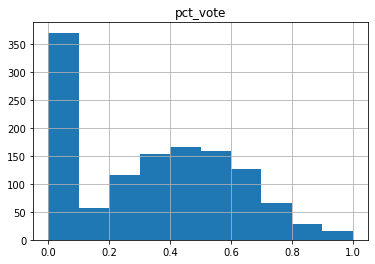

In [23]:
df_reg.hist(column='pct_vote', bins = 10)

In [0]:
df_reg= df_reg.set_index('race')

In [25]:
df_reg.sort_values('pct_vote', ascending = False)



,state_po,district,candidate,party,candidatevotes,totalvotes,pct_vote
race,,,,,,,
GA_District 5,GA,District 5,John R. Lewis,democrat,275406,275406,1.000000
NC_District 3,NC,District 3,Walter B. Jones,republican,187901,187901,1.000000
PA_District 18,PA,District 18,Michael F Doyle Jr.,democrat,231472,231472,1.000000
GA_District 8,GA,District 8,Austin Scott,republican,198152,198716,0.997162
NY_District 5,NY,District 5,Gregory W. Meeks,democrat,160500,161471,0.993987
...,...,...,...,...,...,...,...
KY_District 6,KY,District 6,James Germalic,independent,523,302888,0.001727
TN_District 2,TN,District 2,Keith A. LaTorre,independent,349,262134,0.001331
NY_District 3,NY,District 3,Thomas R. Suozzi,reform,343,267062,0.001284


In [0]:
df_reg['writeins']= race_writeins['candidatevotes']

In [27]:
df_reg.describe()

,candidatevotes,totalvotes,pct_vote,writeins
count,1255.000000,1255.000000,1255.000000,481.000000
mean,105179.786454,309038.364940,0.343144,310.623701
std,85916.875417,125307.044076,0.262175,1066.035132
min,0.000000,117494.000000,0.000000,0.000000
25%,10067.500000,240374.000000,0.038484,65.000000
50%,113049.000000,275651.000000,0.349962,145.000000
75%,160031.000000,324906.500000,0.548100,273.000000
max,550584.000000,762498.000000,1.000000,19107.000000


In [28]:
df_reg.loc[df_reg['candidatevotes']<= 10]

,state_po,district,candidate,party,candidatevotes,totalvotes,pct_vote,writeins
race,,,,,,,,
NY_District 2,NY,District 2,Peter T. King,tax revolt,0,241217,0.0,65.0


In [0]:
df_reg= df_reg.loc[(df_reg['candidatevotes'] >= 1) | (df_reg['writeins']>=1000)]

In [0]:
df_reg['writeins'].fillna(value = 0, inplace = True)

In [31]:
df_reg

,state_po,district,candidate,party,candidatevotes,totalvotes,pct_vote,writeins
race,,,,,,,,
CA_District 1,CA,District 1,Audrey Denney,democrat,263096,583188,0.451134,0.0
CA_District 1,CA,District 1,Doug La Malfa,republican,320092,583188,0.548866,0.0
CA_District 10,CA,District 10,Jeff Denham,republican,211910,443800,0.477490,0.0
CA_District 10,CA,District 10,Josh Harder,democrat,231890,443800,0.522510,0.0
CA_District 11,CA,District 11,John Fitzgerald,republican,142624,551362,0.258676,0.0
...,...,...,...,...,...,...,...,...
NC_District 12,NC,District 12,Paul Wright,republican,75164,279138,0.269272,0.0
NC_District 13,NC,District 13,Ted Budd,republican,147570,286316,0.515410,0.0
NC_District 13,NC,District 13,Kathy Manning,democrat,130402,286316,0.455448,0.0


In [32]:
df_reg.info( )

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, CA_District 1 to NC_District 13
Data columns (total 8 columns):
state_po          1254 non-null object
district          1254 non-null object
candidate         1254 non-null object
party             1249 non-null object
candidatevotes    1254 non-null int64
totalvotes        1254 non-null int64
pct_vote          1254 non-null float64
writeins          1254 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


These are districts where party is missing.

In [33]:
df_reg.loc[df_reg['party'].isnull()]

,state_po,district,candidate,party,candidatevotes,totalvotes,pct_vote,writeins
race,,,,,,,,
AL_District 5,AL,District 5,Mo Brooks,NaN,159063,260673,0.610201,222.0
AL_District 5,AL,District 5,Peter Joffrion,NaN,101388,260673,0.388947,222.0
NJ_District 4,NJ,District 4,Christopher H. Smith,NaN,163065,294348,0.553987,0.0
WI_District 8,WI,District 8,Mike Gallagher,NaN,209410,328774,0.636942,99.0
WI_District 8,WI,District 8,Beau Liegeois,NaN,119265,328774,0.362757,99.0
